In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
x = data.drop('basement',axis=1)

In [5]:
y = data.basement

In [6]:
x = pd.get_dummies(x)

In [7]:
x

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [8]:
y = pd.get_dummies(y).yes

In [9]:
y

0      0
1      0
2      1
3      1
4      1
      ..
540    1
541    0
542    0
543    0
544    0
Name: yes, Length: 545, dtype: uint8

0.7719298245614035


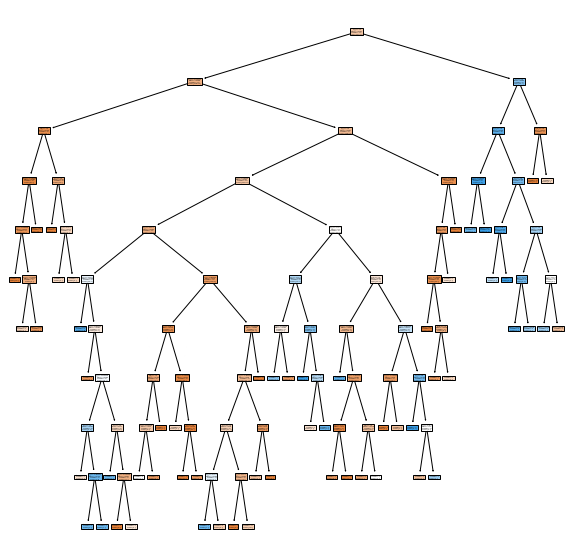

In [10]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2,min_samples_leaf=5,max_leaf_nodes=100,random_state=2021)

model.fit(x,y)

pred = model.predict(x)

from sklearn.metrics import f1_score


print(f1_score(y,pred))

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
some = plot_tree(model,filled=True)

In [18]:
from sklearn.ensemble import RandomForestClassifier


model_obj = RandomForestClassifier(n_estimators=20)

model_obj.fit(x,y)

pred = model_obj.predict(x)

f1_score(pred,y)



0.9947368421052631